# Assignment 8

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/assignments/MIT18_05S14_ps8.pdf

## Problem 1

a)

In [1]:
heads = 3
tails = 9
alpha = 0.05
total = heads+tails
theta_h0 = 0.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [3]:
x = np.arange(total + 1)
y = binom.pmf(x, total, theta_h0)

In [4]:
critical_left_side_value = binom.ppf(alpha, total, theta_h0)-1
critical_left_side_value

2.0

In [5]:
rejection_region = x[:int(critical_left_side_value+1)]
rejection_region

array([0, 1, 2])

In [6]:
p_value = binom.cdf(3, total, theta_h0)
p_value

0.07299804687500001

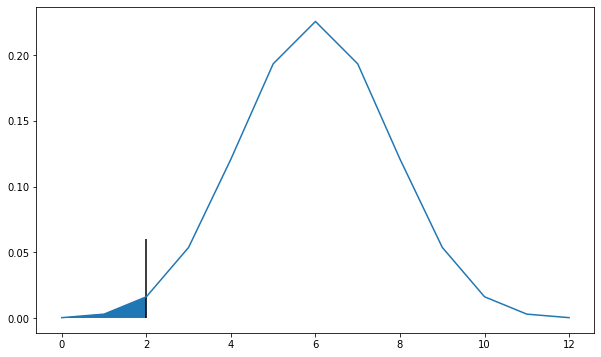

In [7]:
fill_y_top = binom.pmf(rejection_region, total, theta_h0)

fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.plot(x, y)
ax.vlines([critical_left_side_value], ymin=0, ymax=0.06)
ax.fill_between(rejection_region, fill_y_top);

b)  
negative binomial distribution  
$f(k) = \binom{k+n-1}{n-1} p^n (1-p)^k$  

In [8]:
from scipy.stats import nbinom

In [9]:
x = np.arange(0, 20)
# pmf(k, n, p, loc=0)
y = nbinom.pmf(x,heads,theta_h0)

In [10]:
critical_right_side_value = int(nbinom.ppf(1-alpha, heads, theta_h0))+1
critical_right_side_value

9

In [11]:
non_rejection_region = x[:critical_right_side_value]
non_rejection_region

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [12]:
# rejction region probablility
1-nbinom.pmf(non_rejection_region, heads, theta_h0).sum()

0.03271484374999989

In [13]:
p_value = 1 - nbinom.cdf(tails-1, heads, theta_h0)
p_value

0.03271484375

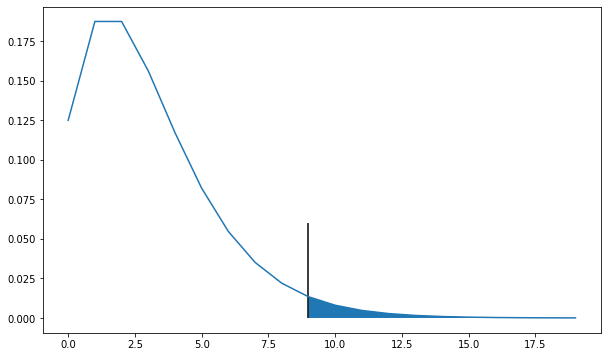

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))
rejection_region = x[critical_right_side_value:]
fill_y_top = y[critical_right_side_value:]

ax.plot(x, y)
ax.vlines([critical_right_side_value], ymin=0, ymax=0.06)
ax.fill_between(rejection_region, fill_y_top);

null hypothesis should be rejected!

c)  
You can not do this. Computing p-value requires experiment be fully specified ahead of time.

d)  
e)  

## Problem 2

In [15]:
x = np.array([1.76, -2.28, -0.56, 1.46, 0.59, 1.26, -1.94, -0.79, -0.86, -1.41, 2.07, 1.30])

$H_0: \sigma^2 = 1$  
$H_1: \sigma^2 > 1$  

$\alpha = 0.05$

In [16]:
N = len(x)
sigma_0 = 1
sample_variance = 1/(N-1) * ((x-x.mean())**2).sum()
print("sample variance =", sample_variance)
sample_std = sample_variance**0.5
print("sample std =", sample_std)

sample variance = 2.3397454545454544
sample std = 1.5296226510304607


In [17]:
test_statistic = (N-1)*(sample_std/sigma_0)**2
test_statistic

25.737199999999998

In [18]:
from scipy.stats import chi2

In [19]:
# cdf(x, df, loc=0, scale=1)
p = 1-chi2.cdf(test_statistic, N-1)
p

0.007100031368829085

In [20]:
if p < alpha:
    print(f"Reject null hypothesis. P-value = {p}")
else:
    print(f"There is no evidence to reject null hypothesis. P-value = {p}")

Reject null hypothesis. P-value = 0.007100031368829085


## Problem 3

In [21]:
alpha = 0.001
benford = np.array([0.301,0.176,0.125,0.097,0.079,0.067,0.058,0.051,0.046])
data = np.array([7,13,12,9,9,13,11,10,16])
data

array([ 7, 13, 12,  9,  9, 13, 11, 10, 16])

In [22]:
O = data
E = benford*sum(data)

In [23]:
G = 2*(O*np.log(O/E)).sum()
G

56.391900717194794

In [24]:
X_sq = ((O-E)**2/E).sum()
X_sq

62.699826337727

In [25]:
# degrees of freedom
df = len(data)-1

In [26]:
p = 1-chi2.cdf(G, df)
p

2.3660914338918815e-09

In [27]:
p2 = 1-chi2.cdf(X_sq, df)
p2

1.3729117842586902e-10

In [28]:
if p < alpha:
    print(f"Reject null hypothesis. P-value = {p}")
else:
    print(f"There is no evidence to reject null hypothesis. P-value = {p}")

Reject null hypothesis. P-value = 2.3660914338918815e-09


## Problem 4

In [29]:
alpha = 0.05

x = np.array([-0.802, 0.457, 0.972, 0.044, 0.318, -1.380, 0.111,
-0.023, -0.700, -1.977, -0.497, 1.471, -1.314, -0.078,
-0.505, 0.583, 1.363, -1.863, -2.105, 0.488])

y = np.array([9.019, 9.852, 7.947, 9.465, 10.060, 10.508, 9.506,
9.540, 10.218, 9.407, 11.455, 11.422, 7.698, 9.972,
10.928, 11.577, 10.376, 8.605, 9.347, 10.715])

In [30]:
x_mean = x.mean()
y_mean = y.mean()

In [31]:
var_x = 1/(len(x)-1)*((x-x_mean)**2).sum()
var_x

1.1301988710526314

In [32]:
var_y = 1/(len(y)-1)*((y-y_mean)**2).sum()
var_y

1.1647411868421051

In [33]:
f = var_x/var_y
f

0.9703433550906478

In [34]:
from scipy.stats import f

In [35]:
# F is less than 1!

# cdf(x, dfn, dfd, loc=0, scale=1)
p = 2 * f.cdf(0.9703433550906478, len(x)-1, len(y)-1)
p

0.9483694823697231

In [36]:
if p < alpha:
    print(f"Reject null hypothesis. P-value = {p}")
else:
    print(f"There is no evidence to reject null hypothesis. P-value = {p}")

There is no evidence to reject null hypothesis. P-value = 0.9483694823697231


## Problem 5

a)  
$H_0$: All the means are identical µ1 = µ2 = . . . = µn.  
$H_A$: Not all the means are the same.  

In [37]:
alpha = 0.01
n = 4 # number of groups
m = 351 # number of samples from each group

In [38]:
sample_means = np.array([1.32, 1.26, 1.53, 1.39])
sample_variances = np.array([0.56, 0.80, 0.93, 0.82])

In [39]:
grand_mean = sample_means.mean()

In [40]:
msb = m/(n-1)*((sample_means - grand_mean)**2).sum()
msb

4.738499999999999

In [41]:
msw = sample_variances.sum()/n
msw

0.7775

In [42]:
w = msb/msw  # test statistic
w

6.0945337620578774

In [43]:
# cdf(x, dfn, dfd, loc=0, scale=1)
p = 1- f.cdf(w, n-1, n*(m-1))
p

0.00040539688170826427

In [44]:
if p < alpha:
    print(f"Reject null hypothesis. P-value = {p}")
else:
    print(f"There is no evidence to reject null hypothesis. P-value = {p}")

Reject null hypothesis. P-value = 0.00040539688170826427


b)  
We need 6 tests (
1,2
1,3
1,4
2,3
2,4
3,4
)

This would be not appropriate. Significance leve should be 0.01/6 = 0.0016666666666666668

In [45]:
0.01/6

0.0016666666666666668

c)  
$H_0$ For a specified: µx − µy = 0  
$H_A$ µx − µy > 0

In [50]:
from scipy.stats import t
alpha = 0.01
mu_0 = 0
n = 351
m = 351

In [52]:
x_mean = sample_means[2]
x_var = sample_variances[2]
print(f"X: mean: {x_mean}, var: {x_var}")
y_mean = sample_means[0]
y_var = sample_variances[0]
print(f"Y: mean: {y_mean}, var: {y_var}")
pooled_var = (x_var + y_var)/n
df = n + m - 2
test_value = (x_mean - y_mean - mu_0)/pooled_var**0.5
print(f"Test statistic: {test_value}")
p_value = 1 - t.cdf(test_value, df)
print(f"P-value : {p_value}")

X: mean: 1.53, var: 0.93
Y: mean: 1.32, var: 0.56
Test statistic: 3.2231440734352534
P-value : 0.000663362390600164


In [53]:
x_mean = sample_means[2]
x_var = sample_variances[2]
print(f"X: mean: {x_mean}, var: {x_var}")
y_mean = sample_means[1]
y_var = sample_variances[1]
print(f"Y: mean: {y_mean}, var: {y_var}")
pooled_var = (x_var + y_var)/n
df = n + m - 2
test_value = (x_mean - y_mean - mu_0)/pooled_var**0.5
print(f"Test statistic: {test_value}")
p_value = 1 - t.cdf(test_value, df)
print(f"P-value : {p_value}")

X: mean: 1.53, var: 0.93
Y: mean: 1.26, var: 0.8
Test statistic: 3.8458670857972326
P-value : 6.554088168353456e-05


In [54]:
x_mean = sample_means[2]
x_var = sample_variances[2]
print(f"X: mean: {x_mean}, var: {x_var}")
y_mean = sample_means[3]
y_var = sample_variances[3]
print(f"Y: mean: {y_mean}, var: {y_var}")
pooled_var = (x_var + y_var)/n
df = n + m - 2
test_value = (x_mean - y_mean - mu_0)/pooled_var**0.5
print(f"Test statistic: {test_value}")
p_value = 1 - t.cdf(test_value, df)
print(f"P-value : {p_value}")

X: mean: 1.53, var: 0.93
Y: mean: 1.39, var: 0.82
Test statistic: 1.9827253970229983
P-value : 0.023894303321064236
